<a href="https://colab.research.google.com/github/Abeer-Rahman/Workshop-MolSSI-Python-Data-and-Scripting/blob/main/Notebook_6_Scientific_Data_Visualization_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with matplotlib using pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
s_orbitals=pd.read_csv("s_orbitals_1D.csv")

In [ ]:
s_orbitals.head()

,r,1s,2s,3s
0,0.000000,0.564190,0.199471,0.108578
1,0.517241,0.336349,0.114183,0.061683
2,1.034483,0.200519,0.057408,0.029966
3,1.551724,0.119542,0.020580,0.009313
4,2.068966,0.071266,-0.002445,-0.003390


In [ ]:
s_orbitals['r']

0      0.000000
1      0.517241
2      1.034483
3      1.551724
4      2.068966
5      2.586207
6      3.103448
7      3.620690
8      4.137931
9      4.655172
10     5.172414
11     5.689655
12     6.206897
13     6.724138
14     7.241379
15     7.758621
16     8.275862
17     8.793103
18     9.310345
19     9.827586
20    10.344828
21    10.862069
22    11.379310
23    11.896552
24    12.413793
25    12.931034
26    13.448276
27    13.965517
28    14.482759
29    15.000000
Name: r, dtype: float64

In [ ]:
#iloc function is used to slice the data frame,index of location can only be integers
s_orbitals.iloc[2:10,:2]

,r,1s
2,1.034483,0.200519
3,1.551724,0.119542
4,2.068966,0.071266
5,2.586207,0.042486
6,3.103448,0.025329
7,3.620690,0.015100
8,4.137931,0.009002
9,4.655172,0.005367


In [ ]:
import matplotlib.pyplot as plt
#make ploting interactive
%matplotlib notebook


<IPython.core.display.Javascript object>


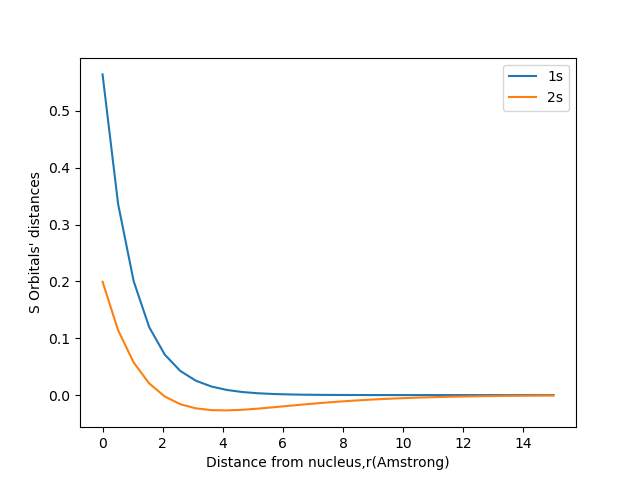

In [ ]:
#procedural interface
plt.figure()
plt.xlabel("Distance from nucleus,r(Amstrong)")
plt.ylabel("S Orbitals' distances")
plt.plot(s_orbitals["r"],s_orbitals["1s"],label='1s')
plt.plot(s_orbitals["r"],s_orbitals["2s"],label='2s')
plt.legend()


<IPython.core.display.Javascript object>


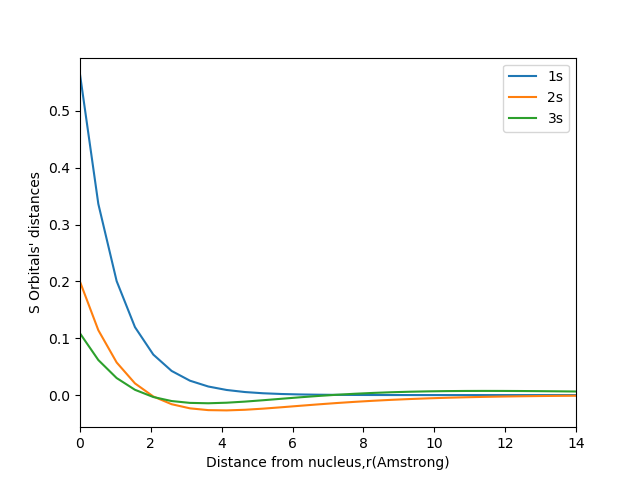

In [ ]:
#Object oriented interface
#put the figure in variables
fig, ax=plt.subplots() #plt.subplot() always return two values
plt.xlabel("Distance from nucleus,r(Amstrong)")
plt.ylabel("S Orbitals' distances")
#instead of plt.plot() we are going to use  ax.plot  variable to create plot
ax.plot("r","1s",data=s_orbitals)
ax.plot("r","2s",data=s_orbitals)
ax.plot("r","3s",data=s_orbitals)


<IPython.core.display.Javascript object>


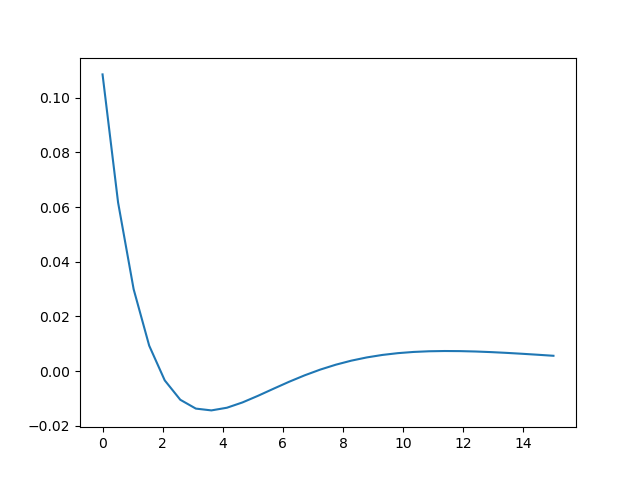

In [ ]:
fig2,ax2= plt.subplots()
ax2.plot("r","3s",data=s_orbitals)

<IPython.core.display.Javascript object>


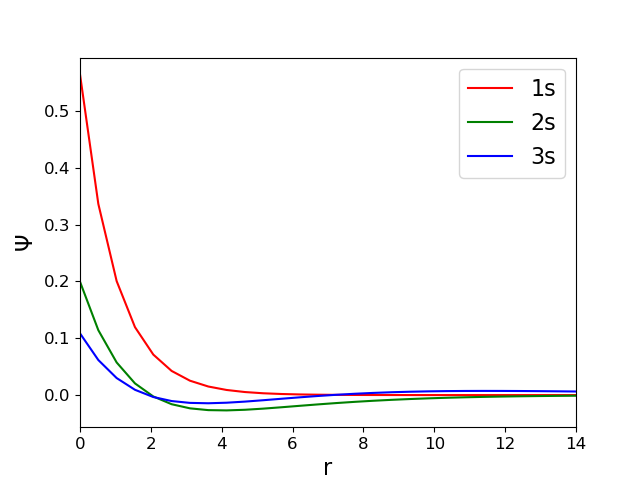

In [ ]:
#plot customization
fig2,ax2= plt.subplots()
# ax2.plot("r","1s",data=s_orbitals,color="red")
# ax2.plot("r","2s",data=s_orbitals,color="green")
# ax2.plot("r","3s",data=s_orbitals,color="blue")

##Hex value can be used to specify colors
#Go to html color codes

ax2.plot("r","1s",data=s_orbitals,color="red")
ax2.plot("r","2s",data=s_orbitals,color="green")
ax2.plot("r","3s",data=s_orbitals,color="blue")
ax2.legend(fontsize=16)
#for pandas dataframe column names will automatically be taken as labels

ax2.set_ylabel("$\Psi$",fontsize=16) # for symbol $\symbol_name$
ax2.set_xlabel("r",fontsize=16)
ax2.set_xlim(0,14)
ax2.tick_params(axis="both",which="major",labelsize=12)




Additional Resources:
university branding,hex value,color hunt

In [ ]:
#accessing the plot
ax2.lines

In [ ]:
ax2.lines[0].get_color()

'red'

In [ ]:
#Saving figure in high quality
fig2.savefig("s_orbitals.png",dpi=300)

In [ ]:
fig2.savefig("s_orbitals_transparent.png",dpi=300,transparent=True)

In [ ]:
#saving figure as scalable vector graphics
fig2.savefig("s_orbitals_svg.svg")

## Making subplots by using object oriented interface
putitng multiple axes on the same figure

<IPython.core.display.Javascript object>


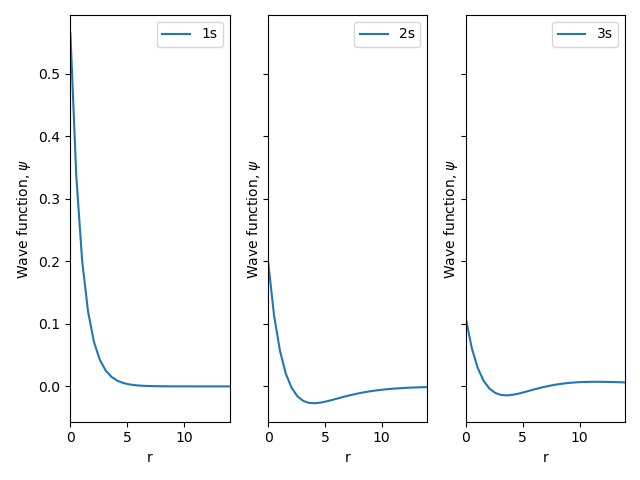

In [ ]:
fig3,ax3=plt.subplots(1,3,sharey=True,sharex=True) #subplots(row,columns),ax3 is a numpy array

ax3[0].plot("r","1s",data=s_orbitals)
ax3[1].plot("r","2s",data=s_orbitals)
ax3[2].plot("r","3s",data=s_orbitals)
for axis in ax3:
    axis.set_xlabel("r")
    axis.set_ylabel("Wave function, $\psi$")
    axis.legend()
    axis.set_xlim(0,14)
fig3.tight_layout() #no overlapping
#sharex is relevant where there are more than one row



## Contour Plots

In [ ]:
px_orbital=pd.read_csv("px_2D.csv",header=None)

In [ ]:
px_orbital.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,-20.000000,-19.000000,-18.000000,-17.000000,-16.000000,-15.000000,-14.000000,-13.000000,-12.000000,...,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000
1,-20.0,0.000353,0.000410,0.000472,0.000538,0.000606,0.000675,0.000742,0.000805,0.000861,...,-0.000905,-0.000861,-0.000805,-0.000742,-0.000675,-0.000606,-0.000538,-0.000472,-0.000410,-0.000353
2,-19.0,0.000432,0.000503,0.000582,0.000665,0.000753,0.000842,0.000930,0.001013,0.001087,...,-0.001147,-0.001087,-0.001013,-0.000930,-0.000842,-0.000753,-0.000665,-0.000582,-0.000503,-0.000432
3,-18.0,0.000524,0.000614,0.000712,0.000818,0.000930,0.001045,0.001158,0.001267,0.001364,...,-0.001445,-0.001364,-0.001267,-0.001158,-0.001045,-0.000930,-0.000818,-0.000712,-0.000614,-0.000524
4,-17.0,0.000632,0.000744,0.000866,0.001000,0.001141,0.001287,0.001433,0.001573,0.001701,...,-0.001809,-0.001701,-0.001573,-0.001433,-0.001287,-0.001141,-0.001000,-0.000866,-0.000744,-0.000632


In [ ]:
x=px_orbital.iloc[0,1:]
y=px_orbital.iloc[1:,0]
px_values=px_orbital.iloc[1:,1:]

<IPython.core.display.Javascript object>


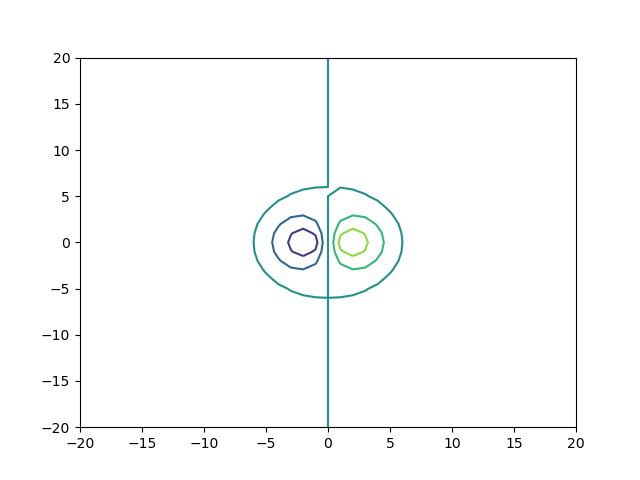

In [ ]:
fig,ax=plt.subplots()
ax.contour(x,y,px_values)


<IPython.core.display.Javascript object>


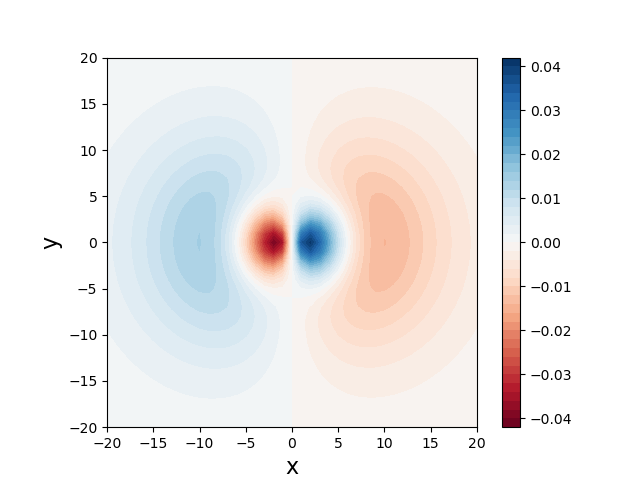

Text(0, 0.5, 'y')

In [ ]:
#see classes of colormaps in matplotib library doc
#diverging colormap has been used
fig3,ax3=plt.subplots()
CS=ax3.contourf(x,y,px_values,cmap="RdBu",levels=40)
ax3.set_aspect("equal")
fig3.colorbar(CS)
ax3.set_xlabel("x",fontsize=16)
ax3.set_ylabel("y",fontsize=16)